In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as patches
sns.set()

### Importar DF

In [57]:
df = pd.read_csv(r"C:\Users\Paola Fajardo\Desktop\CienciaDatos\Estadistica\proyectointegrador\vector_pago_1.csv", dtype=object)

In [3]:
df.head()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUFEIN,SESUFERE,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,...,PORTAFOLIO,FECHA_SUSPENSION,SERVICIO_PRINCIPAL,SEGMENTACION_B2B,GERENCIA_B2B,UEN,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO,REGIONAL
0,119970511,5.41211E+11,7852,10610994,20.09.2012 13:59:42,31.12.4732 23:59:59,2,-1,5,1,...,NaN,NaN,-1,Micro,NaN,B2B,NaN,NaN,NaN,NOROCCIDENTE
1,119958188,1.11111E+11,3905,10432932,01.09.2012 00:00:00,31.12.4732 23:59:59,1,4,5,1,...,NaN,NaN,-1,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
2,119958197,1.11111E+11,3905,5523292,01.09.2012 00:00:00,31.12.4732 23:59:59,1,3,5,1,...,NaN,NaN,-1,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
3,119958208,5.11111E+11,3905,3438583,01.09.2012 00:00:00,31.12.4732 23:59:59,1,3,5,212,...,NaN,NaN,-1,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
4,119958288,5.11112E+11,3905,5305867,01.09.2012 00:00:00,31.12.4732 23:59:59,1,4,5,1,...,NaN,NaN,-1,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE


In [4]:
df.columns

Index(['CUCONUSE', 'VECTOR', 'SESUSERV', 'SESUSUSC', 'SESUFEIN', 'SESUFERE',
       'SESUCATE', 'SESUSUCA', 'SESUDEPA', 'SESULOCA', 'SESUESCO', 'SESUCUSA',
       'SESUSAPE', 'SESUSAAN', 'SESUCICL', 'SESUPLFA', 'SUSCNITC', 'SERVDESC',
       'DEPADESC', 'PLSUDESC', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'TIPIFICACION_CLIENTE', 'SUMA', 'CANTIDAD',
       'CALIFICACION_VECTOR_SERVICIO', 'CALIFICACION_VECTOR_CONTRATO',
       'CALIFICACION_VECTOR_CLIENTE', 'VECTOR_CUALITATIVO_CONTRATO', 'BANCO_1',
       'BANCO_2', 'DIA_PAGO_1', 'DIA_PAGO_2', 'DIA_PAGO_3', 'ANALISIS_VECTOR',
       'FECHA_ACTUALIZACION', 'SISTEMA_ORIGEN', 'PERFIL_DIGITAL', 'PORTAFOLIO',
       'FECHA_SUSPENSION', 'SERVICIO_PRINCIPAL', 'SEGMENTACION_B2B',
       'GERENCIA_B2B', 'UEN', 'LINEA_ABOGADO', 'TRASLADO', 'NOMBRE_TRASLADO',
       'REGIONAL'],
      dtype='object')

In [5]:
df.shape

(366, 58)

In [6]:
df.describe()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUFEIN,SESUFERE,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,...,PORTAFOLIO,FECHA_SUSPENSION,SERVICIO_PRINCIPAL,SEGMENTACION_B2B,GERENCIA_B2B,UEN,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO,REGIONAL
count,366,366,366,366,366,306,366,366,366,366,...,0,9,302,12,0,366,0,0,0,366
unique,366,130,16,323,162,13,3,10,6,42,...,0,9,6,3,0,2,0,0,0,3
top,119965049,1.11111E+11,3905,575809,01.09.2012 00:00:00,31.12.4732 23:59:59,1,3,5,1,...,NaN,07.05.2020 22:09:18,-1,Micro,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
freq,1,57,194,3,194,294,317,178,199,129,...,NaN,1,295,9,NaN,357,NaN,NaN,NaN,268


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CUCONUSE                      366 non-null    object
 1   VECTOR                        366 non-null    object
 2   SESUSERV                      366 non-null    object
 3   SESUSUSC                      366 non-null    object
 4   SESUFEIN                      366 non-null    object
 5   SESUFERE                      306 non-null    object
 6   SESUCATE                      366 non-null    object
 7   SESUSUCA                      366 non-null    object
 8   SESUDEPA                      366 non-null    object
 9   SESULOCA                      366 non-null    object
 10  SESUESCO                      366 non-null    object
 11  SESUCUSA                      366 non-null    object
 12  SESUSAPE                      336 non-null    object
 13  SESUSAAN            

### VECTOR_CUALITATIVO_CONTRATO

In [135]:
vector_cualitativo = df['VECTOR_CUALITATIVO_CONTRATO'].value_counts()
vector_cualitativo = vector_cualitativo.to_frame()
vector_cualitativo.head()

,VECTOR_CUALITATIVO_CONTRATO
EXCELENTE,179
BUENO,71
REGULAR,64
MALO,52


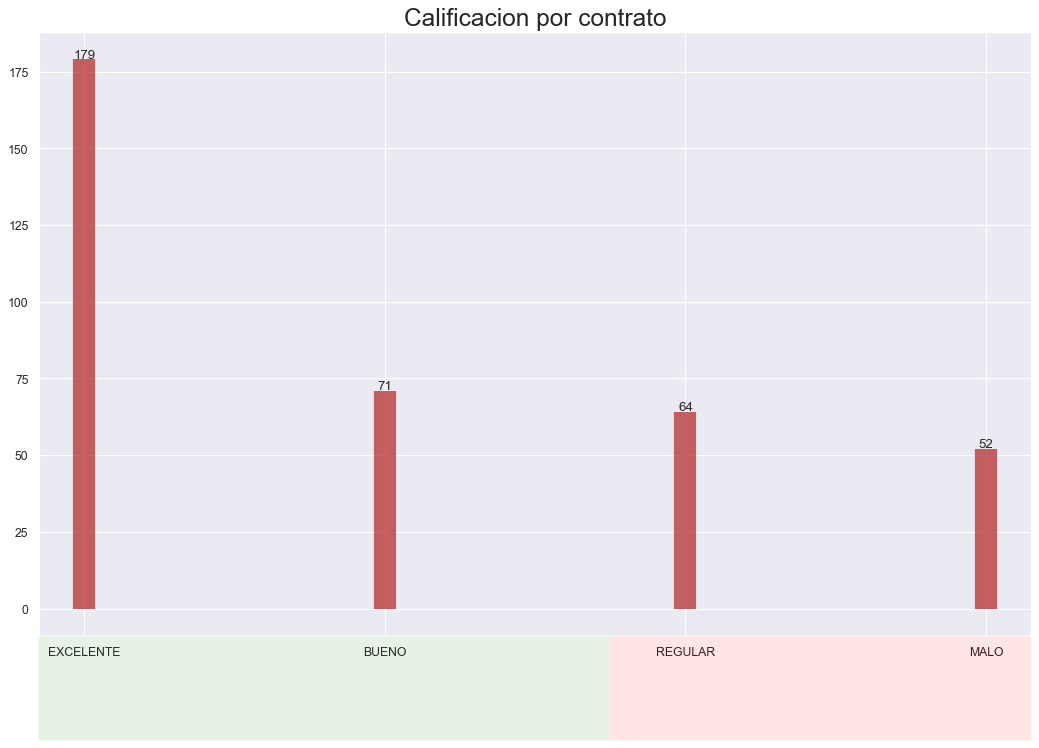

In [160]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=vector_cualitativo.index, ymin=0, ymax=vector_cualitativo.VECTOR_CUALITATIVO_CONTRATO, color='firebrick', alpha=0.7, linewidth=20)


# Annotate Text
for i, VECTOR_CUALITATIVO_CONTRATO in enumerate(vector_cualitativo.VECTOR_CUALITATIVO_CONTRATO):
    ax.text(i, VECTOR_CUALITATIVO_CONTRATO+0.5, round(VECTOR_CUALITATIVO_CONTRATO, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion por contrato', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### Banco 1

In [78]:
banco1 = df['BANCO_1'].value_counts()
banco1 = banco1.to_frame()
banco1.head()

,BANCO_1
GANA EN LINEA,80
BANCOLOMBIA,50
PSE - Botón de Pagos,27
UNE - BANCOLOMBIA,23
UNE - GANA EN LINEA,23


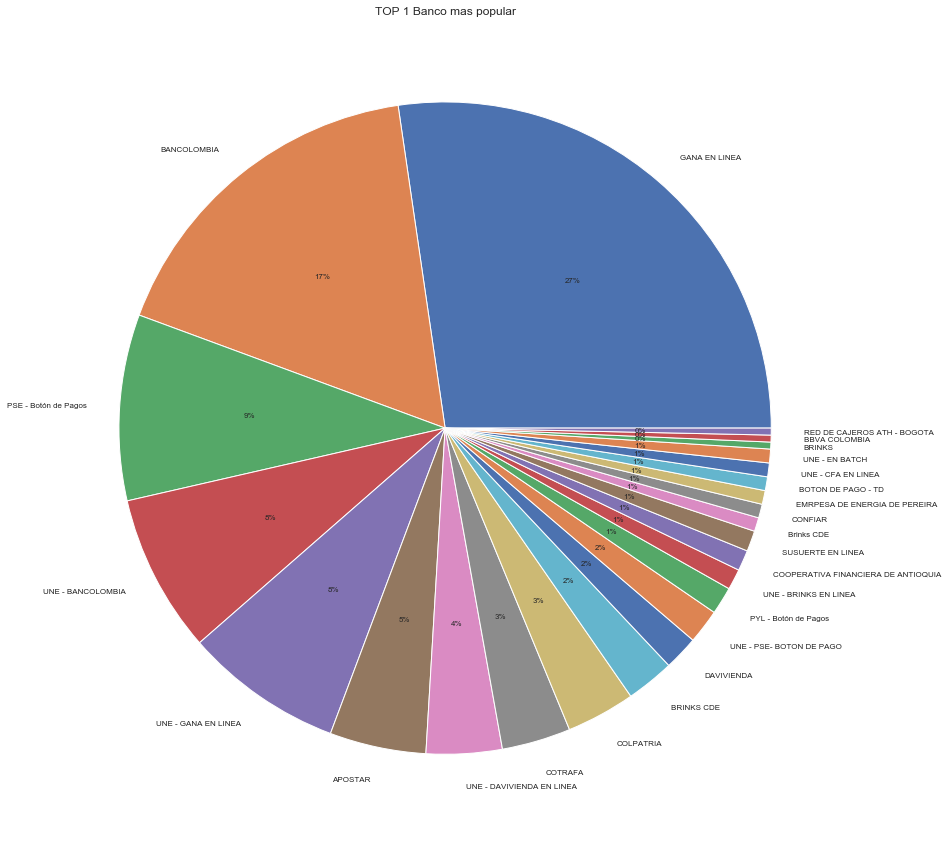

In [113]:
plot = banco1.plot.pie(y='BANCO_1', figsize=(15, 15), autopct='%1.0f%%', legend = None, fontsize = (8))
plt.title("TOP 1 Banco mas popular")
plt.ylabel("")
plt.show()

### Banco 2

In [116]:
banco2 = df['BANCO_2'].value_counts()
banco2 = banco2.to_frame()
banco2.head()

,BANCO_2
BANCOLOMBIA,41
GANA EN LINEA,31
UNE - EN BATCH,21
COLPATRIA,18
PSE - Botón de Pagos,16


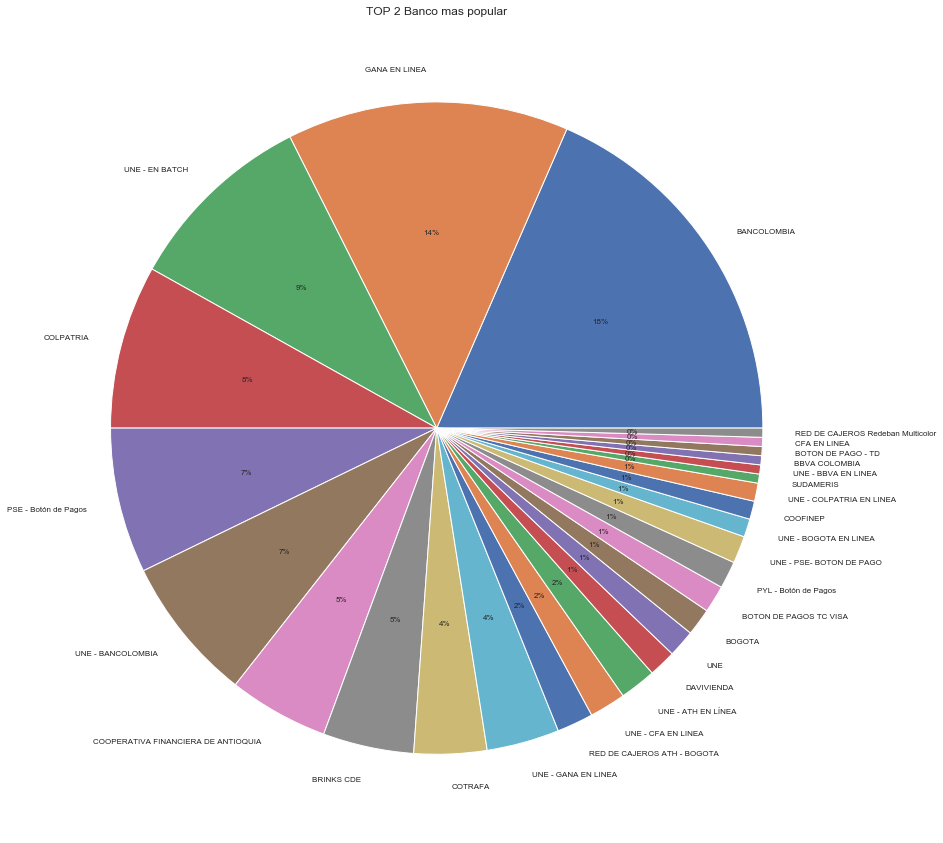

In [117]:
plot = banco2.plot.pie(y='BANCO_2', figsize=(15, 15), autopct='%1.0f%%', legend = None, fontsize = (8))
plt.title("TOP 2 Banco mas popular")
plt.ylabel("")
plt.show()

### Dia 1 mas utilizado para hacer pagos

In [40]:
dia1 = df["DIA_PAGO_1"].dropna()
dia1 = dia1.astype(str).astype(int)

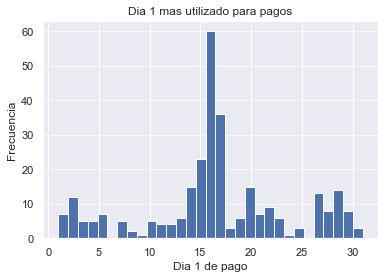

In [103]:
plt.hist(dia1, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 1 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 1 mas utilizado para pagos')
plt.show()

### Dia 2 mas utilizado para hacer pagos

In [29]:
dia2 = df["DIA_PAGO_2"].dropna()
dia2 = dia2.astype(str).astype(int)

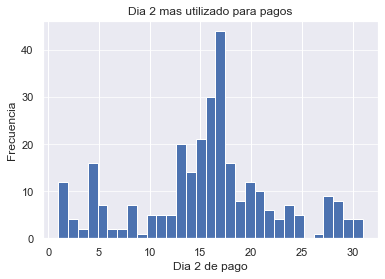

In [104]:
plt.hist(dia2, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 2 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 2 mas utilizado para pagos')
plt.show()

### Dia 3 mas utilizado para hacer pagos

In [37]:
dia3 = df["DIA_PAGO_3"].dropna()
dia3 = dia3.astype(str).astype(int)

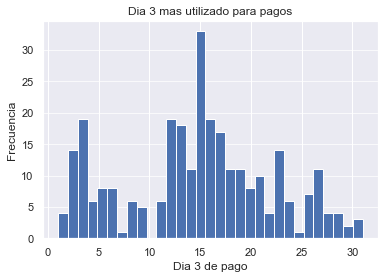

In [105]:
plt.hist(dia3, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 3 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 3 mas utilizado para pagos')
plt.show()